In [135]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
# Scalers
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [72]:
df = pd.read_excel('../data/WonderfulWinesoftheWorld.xlsx', index_col=0)

In [127]:
agedf = df.groupby(['Age']).count()

In [73]:
df.drop(df.tail(1).index,inplace=True)

In [131]:
agedf

,Dayswus,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Age,,,,,,,,,,,,,,,,
18.0,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
19.0,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
20.0,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
21.0,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
22.0,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74.0,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
75.0,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
76.0,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156


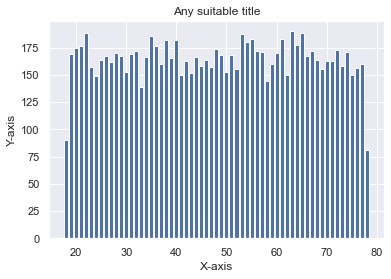

In [179]:
plt.bar(agedf.index, agedf['Dayswus'])
plt.xlabel("X-axis")  # add X-axis label
plt.ylabel("Y-axis")  # add Y-axis label
plt.title("Any suitable title")  # add title
plt.show()

In [74]:
client_features = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'WebPurchase', 'WebVisit']

product_features = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic']

In [180]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(1, len(metric_features), figsize=(17, 6))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df_clean[feat], hue=df_clean['y'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

NameError: name 'metric_features' is not defined

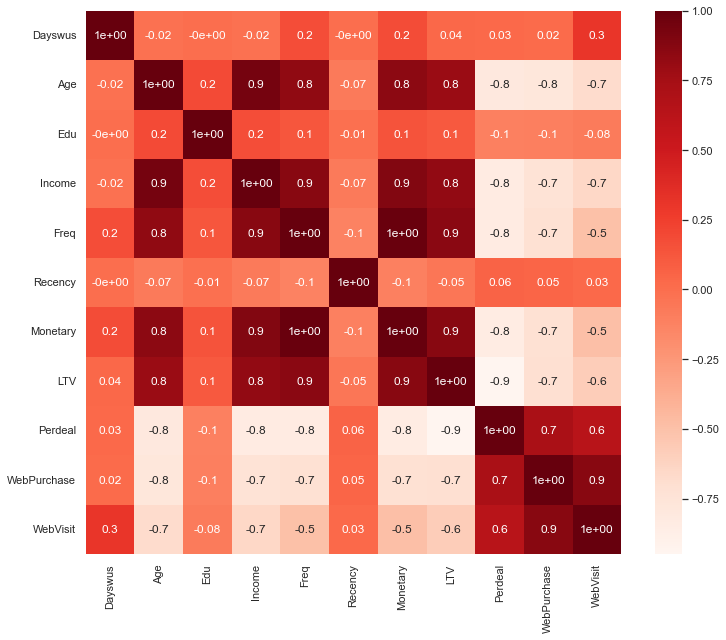

In [181]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[client_features].corr(method="spearman"), decimals=2)


cor_heatmap(corr)

Age -> Income, perdeal, webp, webv
Income -> Age, Freq, Monetary, LTV, perdeal, webp, webv 
Freq -> Age, Income, Monetary, LTV, perdeal, webp
Perdeal -> Age, Income, Freq, Monetary, LTV, Webp, webv
Webp-> Age, Income, Freq, Monetary, LTV, webv
Webv-> Age, Income, LTV, Webp, webv

In [76]:
'Income','Perdeal','WebPurchase'

('Income', 'Perdeal', 'WebPurchase')

In [106]:
important_features = ['Dayswus', 'Age', 'Edu', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic',  'WebVisit']

In [77]:
scaled_df = df.copy()
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df[client_features+product_features])
scaled_df[client_features+product_features] = scaled_feat
scaled_df.head()


,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174


In [78]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\A

([<matplotlib.axis.XTick at 0x2c847e54400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

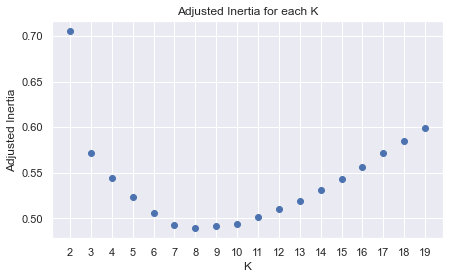

In [100]:
data_matrix = np.matrix(scaled_df[product_features]).astype(float)

# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(data_matrix, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [182]:
range_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_clusters: 
    cluster = KMeans(n_clusters=n_clusters)
    cluster_labels = cluster.fit_predict(scaled_df[important_features])
    silhouette_avg = silhouette_score(scaled_df[important_features],cluster_labels)
    print('abg_silho is: '+str(silhouette_avg))

abg_silho is: 0.2277951829705951
abg_silho is: 0.23818436904878376
abg_silho is: 0.19226781727511386
abg_silho is: 0.17280770117018757
abg_silho is: 0.1815993208812153
abg_silho is: 0.15733557068705276
abg_silho is: 0.1432923121771272


In [183]:
#final cluster solution - KMEANS - Stardard Scaler
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(scaled_df[product_features])

# inserting in the dataset for visualization
km_St = pd.concat((scaled_df.reset_index(), pd.Series(km_labels, name='km_labels')), axis=1).set_index('Custid')
km_St.groupby('km_labels').mean()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
km_labels,,,,,,,,,,,,,,,,,
0,0.014332,0.210905,0.127405,0.199572,0.228489,-0.004292,0.247136,0.270864,-0.124696,-0.308046,-0.209139,0.904527,-0.175179,-0.138177,-0.183253,-0.246271,-0.224860
1,0.012466,0.151240,0.420750,0.136186,0.014091,-0.066314,-0.018787,-0.097549,-0.025909,1.013707,-0.577339,-0.813364,-0.566712,-0.569105,-0.286395,0.131294,0.187108
2,-0.065357,-0.118488,-0.587507,-0.100797,-0.081095,0.032999,-0.069192,-0.005458,-0.060234,-0.936094,0.963270,0.199032,0.842028,0.653143,0.017546,-0.144034,-0.217307
3,0.021682,-1.314920,-1.242369,-1.235847,-0.824476,0.257654,-0.771879,-0.635147,0.756255,-1.503933,1.511960,-0.301238,1.580604,1.840878,2.047809,0.693630,0.500595


In [170]:
Cluster_count = pd.DataFrame(km_St.groupby('km_labels').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
km_labels,
0,3432
1,3941
2,1784
3,843


In [171]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

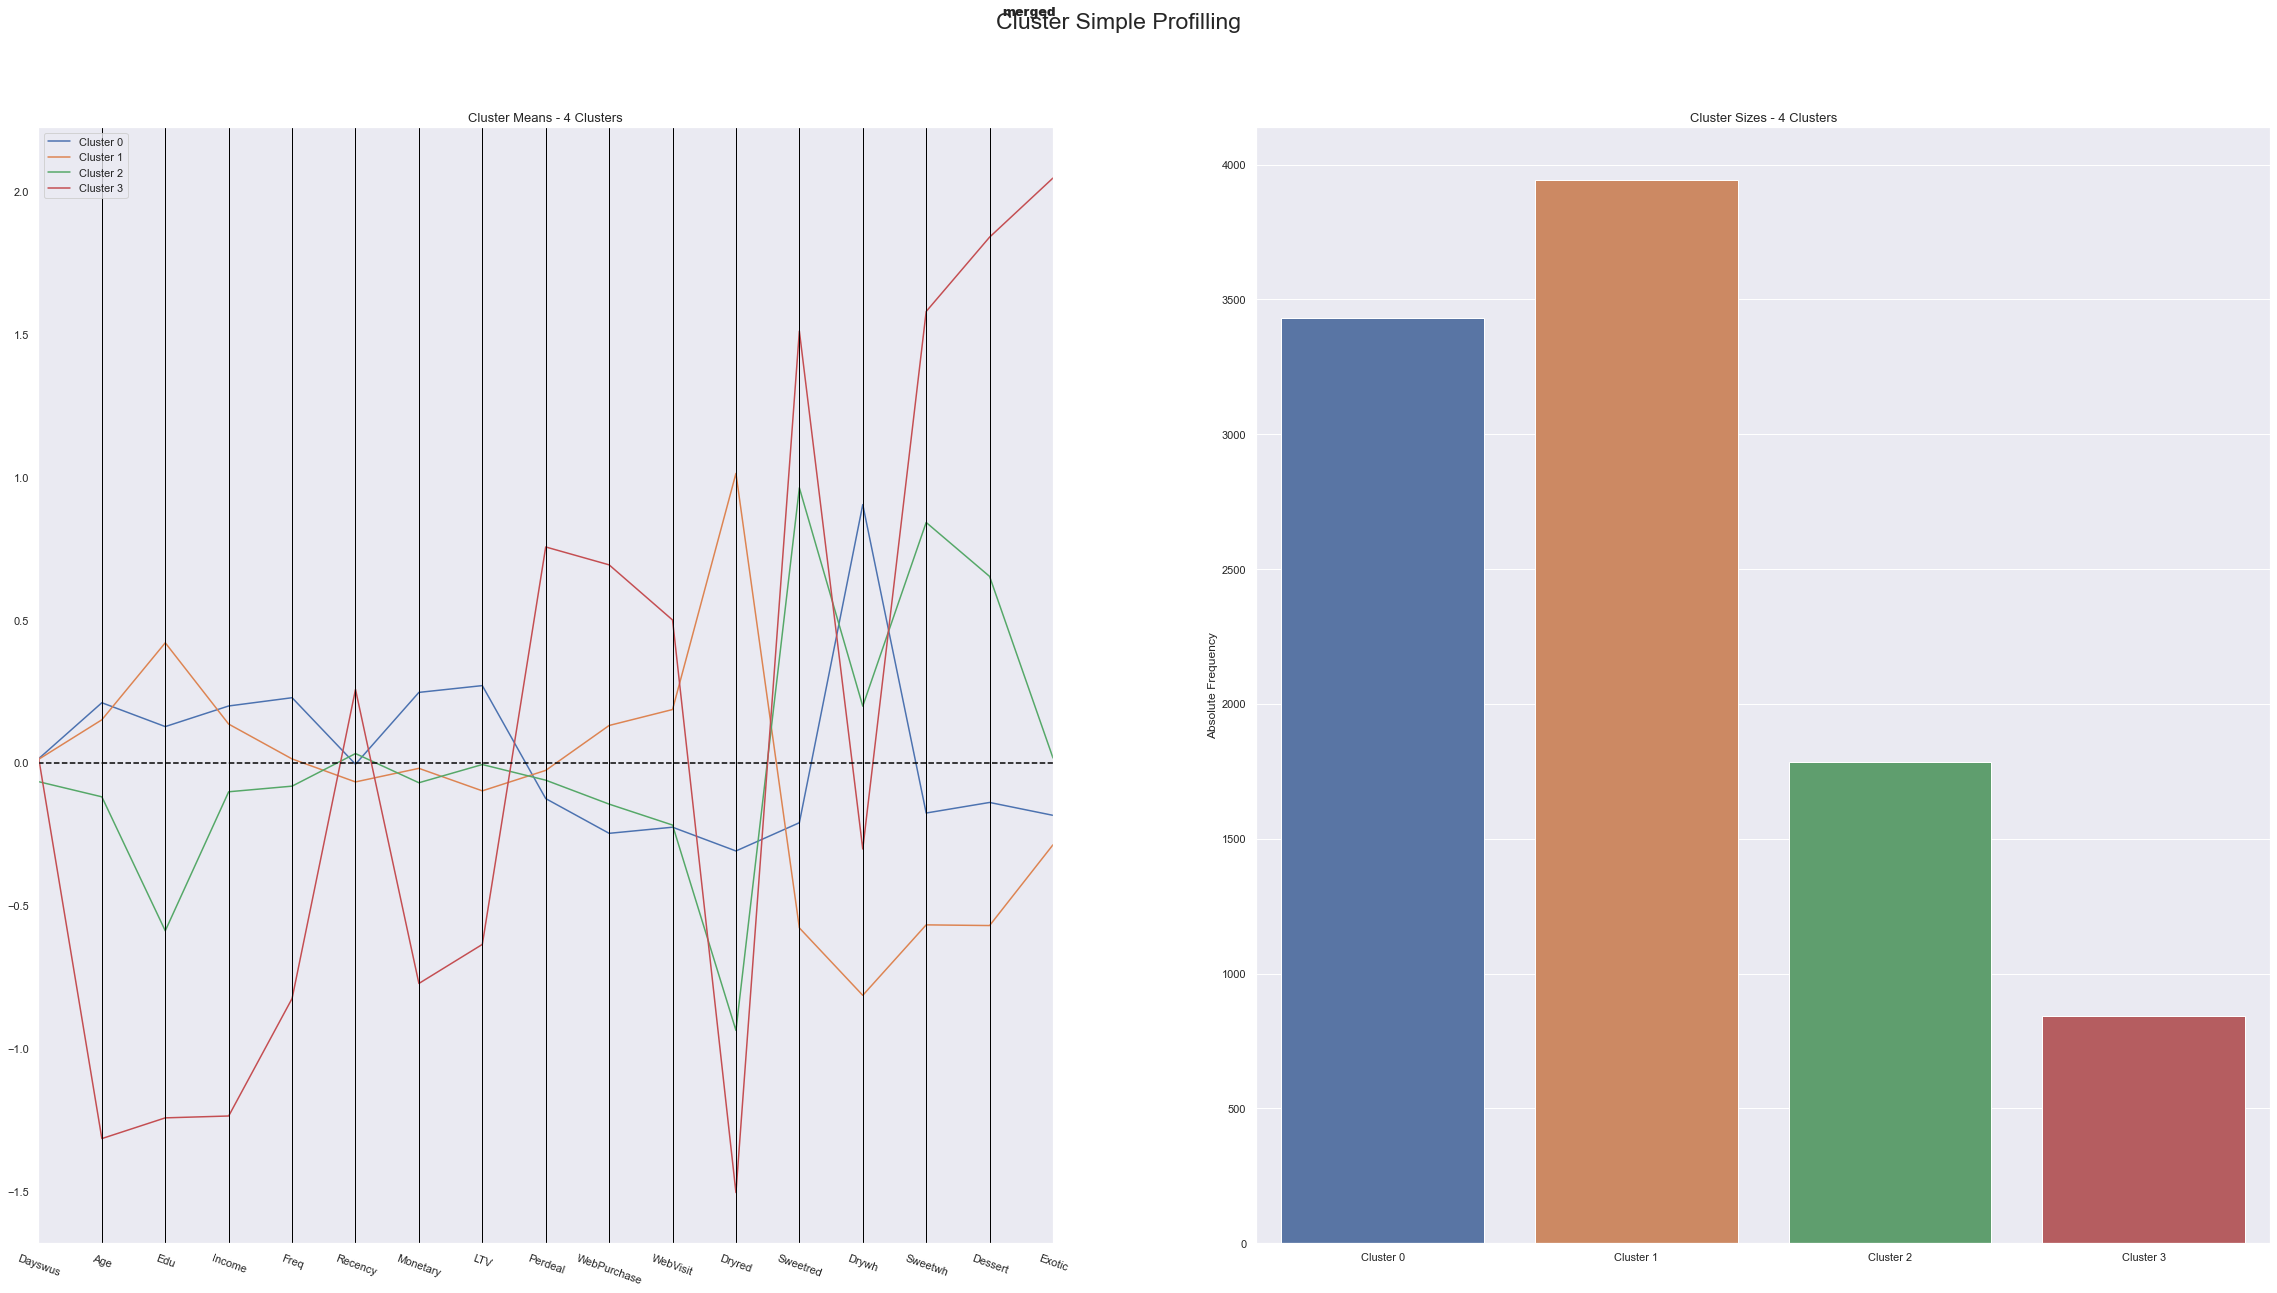

In [184]:
cluster_profiles(
    df = km_St[client_features+product_features + ['km_labels']], 
    label_columns = ['km_labels'], 
    figsize = (40, 20), 
    compar_titles = ["merged"]
)

Clusters: 
1. Cluster 0 - Clientes do DryWh
1. Cluster 1 - Cliente do DryRed (pessoal mais velho)
1. Cluster 2 - Cliente do SweetRed, Sweet wh, Dessert
1. Cluster 3 - sweetRed Exotic - putos, net 

Boa ideia passaria por juntar o SweetRed em campnha com dessert / Exotic promoçoes online ou um marketing online 

In [173]:
km_St.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,km_labels
Custid,,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948,1
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070,0
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418,3
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296,1
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174,1


In [174]:
df_labeld = pd.merge(df,  km_St['km_labels'], left_index=True, right_index=True)

In [175]:
df_plot = df_labeld[product_features+['km_labels']].groupby('km_labels').mean()
df_plot

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic
km_labels,,,,,,
0,43.158217,5.409382,39.903263,5.665793,5.858683,13.386072
1,74.156813,2.513068,18.286476,2.527785,2.463334,11.607206
2,28.428812,14.631726,31.025785,13.818386,12.093610,16.849215
3,15.111507,18.947805,24.730724,19.737841,21.451957,51.864769


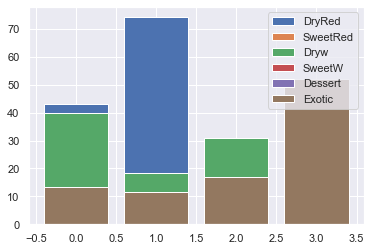

In [176]:
# plot de avg de cada label nos vinhos 
plt.bar(df_plot.index,df_plot['Dryred'], label = "DryRed")
plt.bar(df_plot.index,df_plot['Sweetred'], label = "SweetRed")
plt.bar(df_plot.index,df_plot['Drywh'], label = "Dryw")
plt.bar(df_plot.index,df_plot['Sweetwh'], label = "SweetW")
plt.bar(df_plot.index,df_plot['Dessert'], label = "Dessert")
plt.bar(df_plot.index,df_plot['Exotic'], label = "Exotic")

#plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


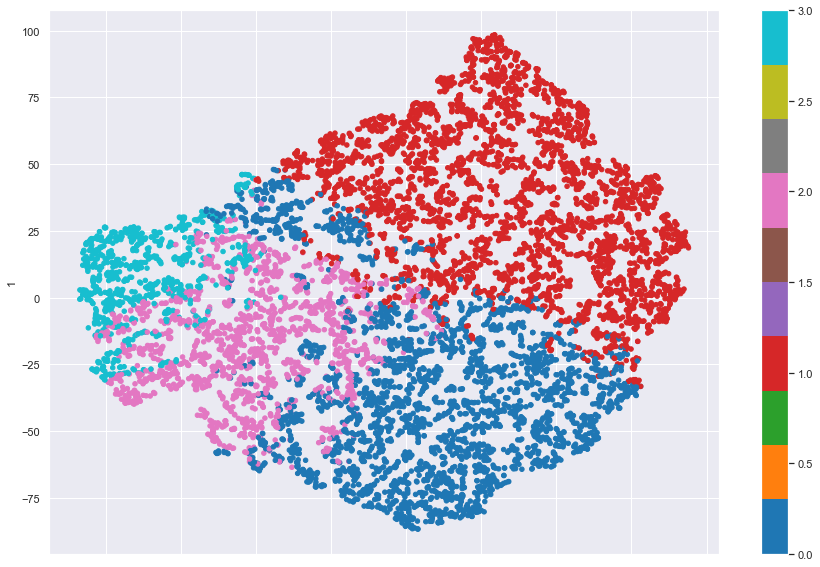

In [178]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(km_St[product_features])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=km_St['km_labels'], colormap='tab10', figsize=(15,10))
plt.show()

# Cluster Client

In [187]:
client_features = ['Dayswus',
 'Age',
 'Edu',
 'Freq',
 'Recency',
 'Monetary',
 'LTV',
 'WebVisit']


C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\A

([<matplotlib.axis.XTick at 0x2c84a436640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

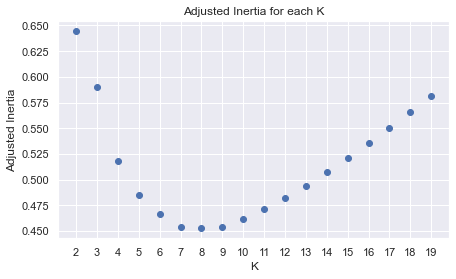

In [188]:
data_matrix = np.matrix(scaled_df[client_features]).astype(float)

# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(data_matrix, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [190]:
range_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_clusters: 
    cluster = KMeans(n_clusters=n_clusters)
    cluster_labels = cluster.fit_predict(scaled_df[client_features])
    silhouette_avg = silhouette_score(scaled_df[client_features],cluster_labels)
    print('abg_silho is: '+str(silhouette_avg))

abg_silho is: 0.36267478830462524
abg_silho is: 0.38066106070739203
abg_silho is: 0.2530490766550898
abg_silho is: 0.2144515811520891
abg_silho is: 0.21943527398201726
abg_silho is: 0.21247379537230754
abg_silho is: 0.20950073032338437


In [191]:
#final cluster solution - KMEANS - Stardard Scaler
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(scaled_df[client_features])

# inserting in the dataset for visualization
km_St = pd.concat((scaled_df.reset_index(), pd.Series(km_labels, name='km_labels')), axis=1).set_index('Custid')
km_St.groupby('km_labels').mean()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
km_labels,,,,,,,,,,,,,,,,,
0,0.757301,-0.692630,-0.190691,-0.664714,-0.511242,-0.141925,-0.529642,-0.587732,0.591867,-0.055792,0.095254,-0.078894,0.095742,0.098508,0.348551,0.674467,0.851559
1,0.119143,1.123412,0.143988,1.117140,1.251863,-0.174917,1.268872,1.248393,-0.989583,-0.072902,-0.066046,0.283839,-0.075697,-0.092596,-0.502417,-1.083449,-0.883897
2,-0.871483,-0.277978,0.086201,-0.298152,-0.576581,-0.149915,-0.593703,-0.535173,0.260346,0.173636,-0.066493,-0.215514,-0.060288,-0.045003,0.079186,0.277591,-0.073134
3,-0.258149,-1.004121,-0.300563,-1.030118,-1.138666,4.789063,-0.937285,-0.718925,0.918832,-0.466201,0.332347,0.220773,0.359644,0.341753,0.501776,0.802126,0.539802


In [192]:
Cluster_count = pd.DataFrame(km_St.groupby('km_labels').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
km_labels,
0,3328
1,3131
2,3227
3,314


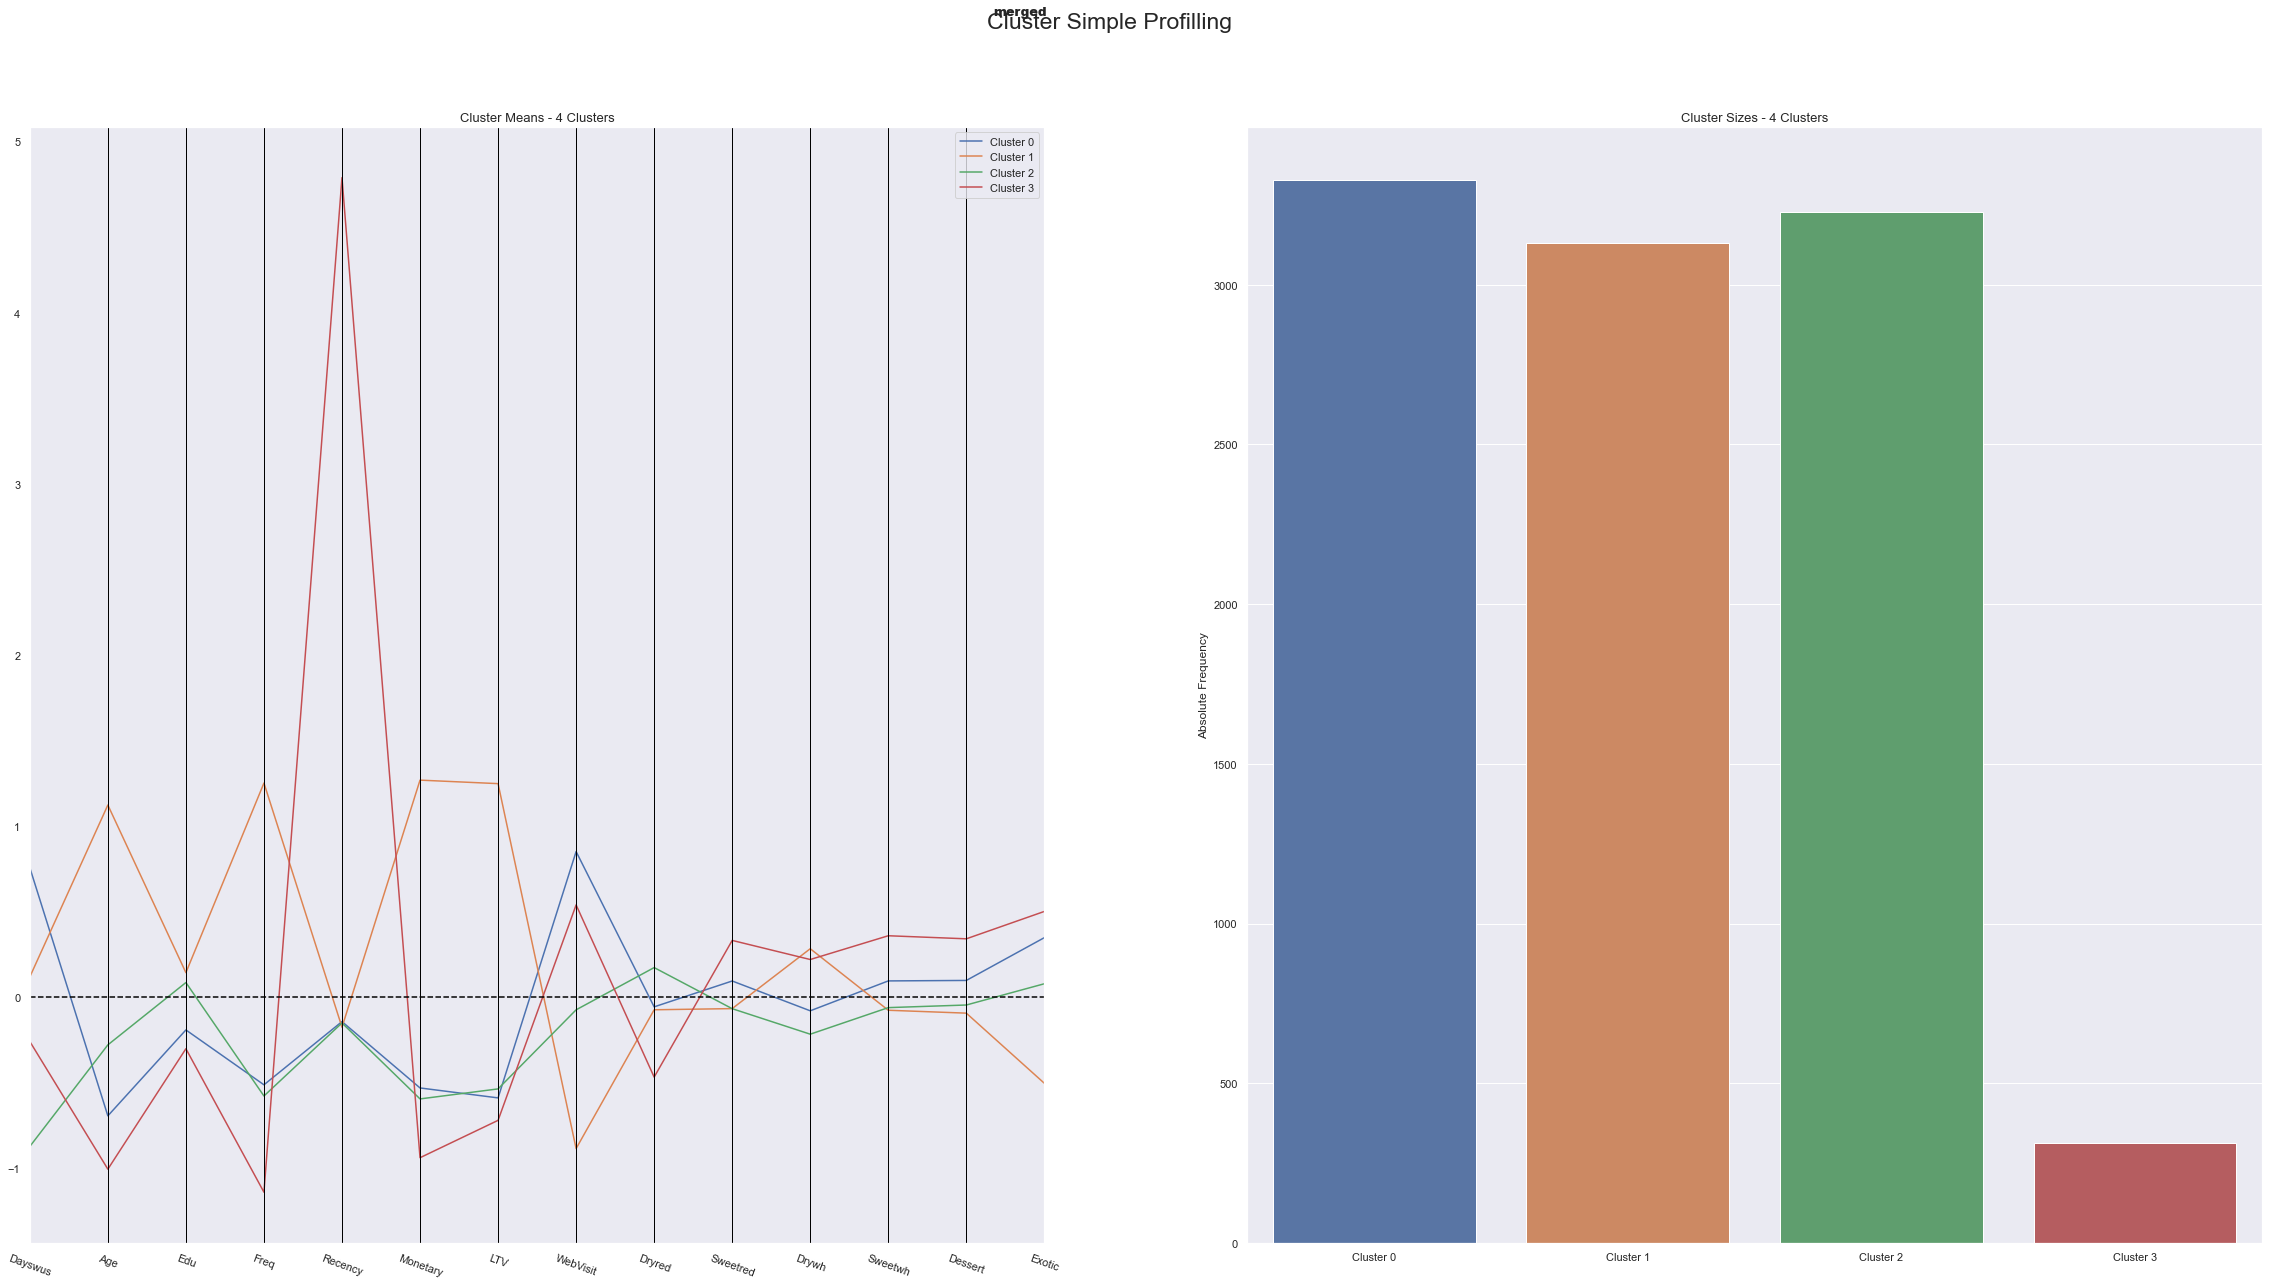

In [194]:
cluster_profiles(
    df = km_St[client_features+product_features + ['km_labels']], 
    label_columns = ['km_labels'], 
    figsize = (40, 20), 
    compar_titles = ["merged"]
)

Clusters: 
1. Cluster 0 - Clientes do DryWh
1. Cluster 1 - Cliente do DryRed (pessoal mais velho)
1. Cluster 2 - Cliente do SweetRed, Sweet wh, Dessert
1. Cluster 3 - sweetRed Exotic - putos, net 

Boa ideia passaria por juntar o SweetRed em campnha com dessert / Exotic promoçoes online ou um marketing online 

In [198]:
km_St.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,km_labels
Custid,,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948,2
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070,1
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418,0
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296,0
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174,2


In [199]:
df_labeld = pd.merge(df,  km_St['km_labels'], left_index=True, right_index=True)

In [202]:
df_plot = df_labeld[client_features+['km_labels']].groupby('km_labels').mean()
df_plot

,Dayswus,Age,Edu,Freq,Recency,Monetary,LTV,WebVisit
km_labels,,,,,,,,
0,1051.442308,35.943510,16.381310,8.509315,52.490385,279.822115,37.470252,7.201022
1,922.226445,67.364420,17.009262,29.610987,50.185244,1443.645800,573.566273,3.156819
2,721.641773,43.117756,16.900837,7.727301,51.932135,238.368144,52.815928,5.046173
3,845.831210,30.554140,16.175159,1.000000,397.022293,16.035032,-0.834395,6.474522


C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


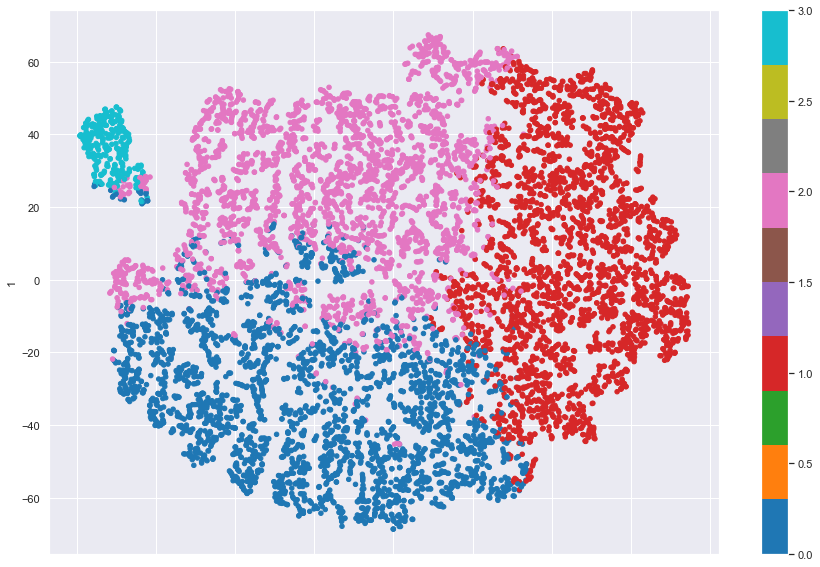

In [204]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(km_St[client_features])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=km_St['km_labels'], colormap='tab10', figsize=(15,10))
plt.show()